# Importing 

In [98]:
from matplotlib import pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figure=0):
   
    plt.figure(figure)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def plot_and_return_top_features(classifier, vectorizer, top_features=20):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:top_features]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-top_features:]
    top_coefficients = np.hstack([topn_class1, topn_class2])
    if set(topn_class1).union(topn_class2):
        top_coefficients = topn_class1
        for ce in topn_class2:
            if ce not in topn_class1:
                top_coefficients.append(x)

    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in [tc[0] for tc in top_coefficients]]
    plt.bar(np.arange(len(top_coefficients)), [tc[0] for tc in top_coefficients], color=colors)
    plt.xticks(np.arange(len(top_coefficients)),
               [tc[1] for tc in top_coefficients], rotation=60, ha='right')
    plt.show()
    return top_coefficients

In [99]:
import random

In [100]:
random.seed(53)

In [101]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [102]:
from sklearn import metrics

In [103]:
from sklearn.naive_bayes import MultinomialNB

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
from sklearn.svm import LinearSVC

In [106]:
import pandas as pd

In [107]:
cd

C:\Users\91952


# Importing dataset

In [108]:
tweets_df=pd.read_csv("tweets.csv",index_col=0)

In [109]:
tweets_df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


In [110]:
y=tweets_df['author']
x=tweets_df['status']

# Splitting into train and test

In [111]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=52,test_size=0.3)

# Applying vectorizers

In [112]:
count_vectorizer=CountVectorizer(stop_words='english',max_df=0.9,min_df=0.05)

In [113]:
count_train=count_vectorizer.fit_transform(X_train)

In [114]:
count_test=count_vectorizer.transform(X_test)

In [115]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.9,min_df=0.05)

In [116]:
tfidf_train=tfidf_vectorizer.fit_transform(X_train)

In [117]:
tfidf_test=tfidf_vectorizer.transform(X_test)

# Using multinomial Naive Bayes Model

In [118]:
tfidf_nb=MultinomialNB()

In [119]:
tfidf_nb.fit(tfidf_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [120]:
tfidf_nb_pred=tfidf_nb.predict(tfidf_test)

In [121]:
tfidf_nb_acc=metrics.accuracy_score(tfidf_nb_pred,y_test)

In [122]:
count_nb=MultinomialNB()

In [123]:
count_nb.fit(count_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [124]:
count_nb_pred=count_nb.predict(count_test)

In [125]:
count_nb_acc=metrics.accuracy_score(count_nb_pred,y_test)

In [126]:
print("Count accuracy=",count_nb_acc)
print("Tfidf accuracy=",tfidf_nb_acc)

Count accuracy= 0.65
Tfidf accuracy= 0.625


# Plotting the confusion matrix

Confusion matrix, without normalization


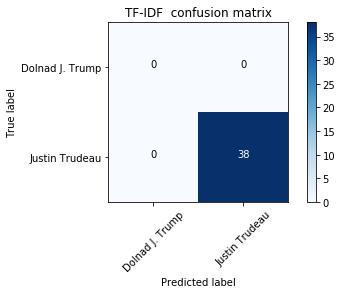

In [129]:
tfidf_nb_cm=metrics.confusion_matrix(y_test,tfidf_nb_pred,labels=['Dolnad J. Trump','Justin Trudeau'])
plot_confusion_matrix(tfidf_nb_cm,classes=['Dolnad J. Trump','Justin Trudeau'],title='TF-IDF  confusion matrix')

Confusion matrix, without normalization


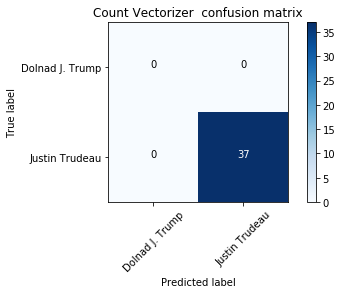

In [130]:
count_nb_cm=metrics.confusion_matrix(y_test,count_nb_pred,labels=['Dolnad J. Trump','Justin Trudeau'])
plot_confusion_matrix(count_nb_cm,classes=['Dolnad J. Trump','Justin Trudeau'],title='Count Vectorizer  confusion matrix')

# Using Linear SVC Instead of Naive Bayes

In [137]:
tfidf_svc=LinearSVC()

In [138]:
tfidf_svc.fit(tfidf_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [139]:
tfidf_svc_pred=tfidf_svc.predict(tfidf_test)

In [142]:
tfidf_svc_acc=metrics.accuracy_score(tfidf_svc_pred,y_test)

In [144]:
print("LInear SVC score=",tfidf_svc_acc)

LInear SVC score= 0.7583333333333333


# Linear SVC confusion matrix


In [145]:
svc_cm=metrics.confusion_matrix(y_test,tfidf_svc_pred,labels=['Donald J. Trump','Justin Trudeau'])

Confusion matrix, without normalization


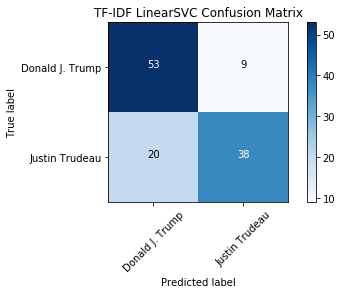

In [146]:
plot_confusion_matrix(svc_cm,classes=['Donald J. Trump','Justin Trudeau'],title="TF-IDF LinearSVC Confusion Matrix")

In [131]:
from pprint import pprint

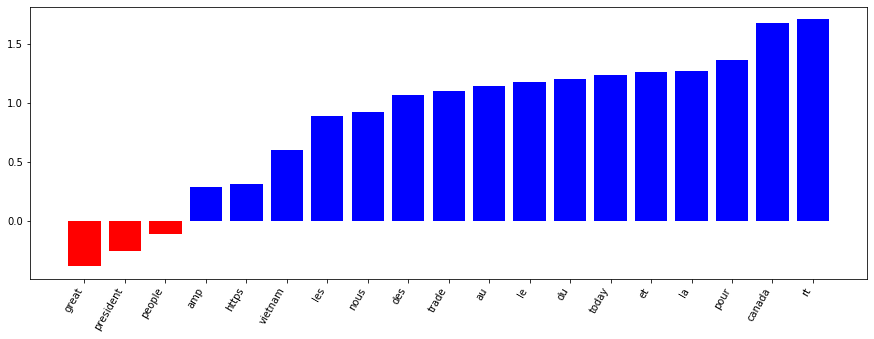

In [148]:
top_features=plot_and_return_top_features(tfidf_svc,tfidf_vectorizer)

# Predicting tweets

In [187]:
tweet="when my day starts I go to washroom"


In [188]:
tweet_vectorized=tfidf_vectorizer.transform([tweet])

In [189]:
tweet_pred=tfidf_svc.predict(tweet_vectorized)

In [190]:
print("Predicted Tweet= ",tweet_pred)

Predicted Tweet=  ['Donald J. Trump']
